# Actividad 6.1 (Valores Atípicos)
- Miranda Eugenia Colorado Arróniz A01737027

#### 1. Cargar el archivo VentasTotales.csv

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('../Ventas_totales.csv')
df.head()

,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,tarjetas_credito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,01/01/2017,27858.9,27477.3,27858872.08,27591730.13,267141.956,27858872.08,1.023010e+07,6864575.384,9047205.493,...,6705475.318,9.459063e+05,2880656.169,2606192.942,1.050314e+06,340777.3882,4397543.671,772371.8476,1838507.096,2806660.309
1,01/02/2017,25994.2,25223.4,25994200.17,25749179.40,245020.769,25994200.17,9.719067e+06,6438494.011,8309150.301,...,6576624.803,9.256186e+05,2855639.900,2600083.591,1.026167e+06,328288.6951,4053283.771,672290.5165,1257661.903,2354084.901
2,01/03/2017,27780.0,26334.3,27780006.52,27472228.72,307777.804,27780006.52,1.024444e+07,6908522.962,8845010.494,...,7437264.174,1.016148e+06,3188259.169,2824976.726,1.075526e+06,353335.1548,4354197.611,667696.6653,1305674.917,2266189.277
3,01/04/2017,29134.3,27045.9,29134272.22,28827479.49,306792.733,29134272.22,1.031263e+07,7454251.800,9458166.682,...,8211244.093,1.132396e+06,3257140.159,3006158.760,1.037213e+06,359694.4537,4355706.646,838948.2458,1535726.345,2146755.887
4,01/05/2017,27969.0,25631.9,27969004.68,27569311.41,399693.262,27969004.68,1.014761e+07,6735747.319,9220929.862,...,7651058.084,1.033082e+06,3232635.767,2799142.123,9.826512e+05,336568.0085,4206101.605,915895.1498,1824462.036,2117971.483


#### 2. Aplicar métodos para reemplazar valores nulos en cada columna

In [ ]:
valores_nulos = df.isnull().sum()
print('Valores nulos por columna:')
print(valores_nulos[valores_nulos > 0])

df_limpio = df.copy()

for columna in df_limpio.columns:
    if df_limpio[columna].isnull().sum() > 0:
        if df_limpio[columna].dtype == 'float64' or df_limpio[columna].dtype == 'int64':
            # Si es numérica, reemplazar con la media
            df_limpio[columna] = df_limpio[columna].fillna(round(df_limpio[columna].mean(), 1))
        else:
            # Si es objeto, reemplazar con forward fill
            df_limpio[columna] = df_limpio[columna].fillna(method='ffill')

# Ver que ya no hayan valores nulos
print('\nValores nulos después del reemplazo:')
print(df_limpio.isnull().sum())

Valores nulos por columna:
salon_ventas                            6
tarjetas_debito                         1
tarjetas_credito                        7
otros_medios                            1
subtotal_ventas_alimentos_bebidas      10
bebidas                                 1
almacen                                 2
panaderia                               1
lacteos                                 1
carnes                                  1
verduleria_fruteria                     1
alimentos_preparados_rotiseria          1
indumentaria_calzado_textiles_hogar     2
electronicos_articulos_hogar            3
otros                                   4
dtype: int64

Valores nulos después del reemplazo:
indice_tiempo                          0
ventas_precios_corrientes              0
ventas_precios_constantes              0
ventas_totales_canal_venta             0
salon_ventas                           0
canales_on_line                        0
ventas_totales_medio_pago              0
efect

#### 3. Aplicar métodos (Desviación Estándar y Rango Intercuartílico) para eliminar Outliers, comprobar con diagramas de caja por cada columna

a) Desviación Estándar

Límite superior permitido:
ventas_precios_corrientes              2.143126e+05
ventas_precios_constantes              4.002291e+04
ventas_totales_canal_venta             2.074407e+08
salon_ventas                           1.976066e+08
canales_on_line                        7.623053e+06
ventas_totales_medio_pago              2.059531e+08
efectivo                               6.191160e+07
tarjetas_debito                        5.821184e+07
tarjetas_credito                       7.230605e+07
otros_medios                           1.048925e+07
ventas_totales_grupo_articulos         2.059531e+08
subtotal_ventas_alimentos_bebidas      1.430213e+08
bebidas                                2.648442e+07
almacen                                5.504262e+07
panaderia                              6.907607e+06
lacteos                                2.223825e+07
carnes                                 2.509435e+07
verduleria_fruteria                    7.570093e+06
alimentos_preparados_rotiseria       

<Figure size 1500x800 with 0 Axes>

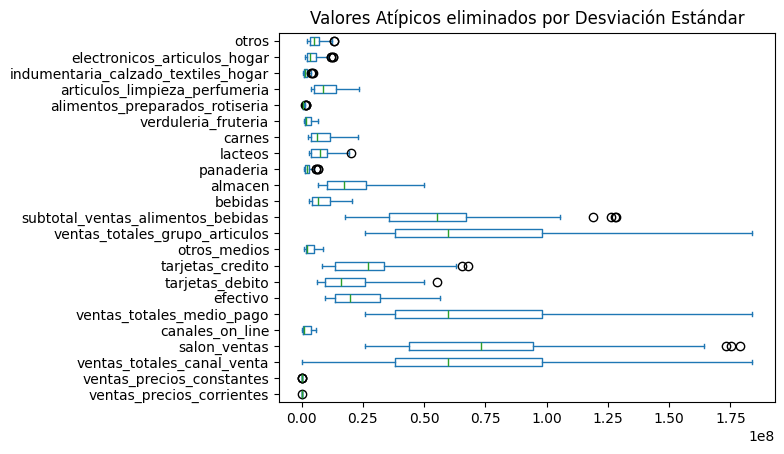

In [ ]:
num = df_limpio.select_dtypes(include=[np.number]) # Solo columnas numéricas para el análisis

# Límites
limite_superior = num.mean() + 3 * num.std()
limite_inferior = num.mean() - 3 * num.std()

print('Límite superior permitido:')
print(limite_superior)
print('\nLímite inferior permitido:')
print(limite_inferior)

df_outliers_std = num[(num <= limite_superior) & (num >= limite_inferior)]

# Ver que cuántos valores nulos quedan
print('\nValores nulos tras eliminar outliers:')
print(df_outliers_std.isnull().sum())

plt.figure(figsize=(15, 8))
df_outliers_std.plot(kind='box', vert=False)
plt.title('Valores Atípicos eliminados por Desviación Estándar')
plt.show()

b) Rango Intercuartílico

Límite superior permitido (IQR):
ventas_precios_corrientes              1.923194e+05
ventas_precios_constantes              3.193875e+04
ventas_totales_canal_venta             1.875116e+08
salon_ventas                           1.704401e+08
canales_on_line                        9.196781e+06
ventas_totales_medio_pago              1.875116e+08
efectivo                               5.942022e+07
tarjetas_debito                        5.095222e+07
tarjetas_credito                       6.385618e+07
otros_medios                           1.061843e+07
ventas_totales_grupo_articulos         1.875116e+08
subtotal_ventas_alimentos_bebidas      1.145480e+08
bebidas                                2.282518e+07
almacen                                5.015298e+07
panaderia                              5.314390e+06
lacteos                                1.994066e+07
carnes                                 2.390920e+07
verduleria_fruteria                    7.832862e+06
alimentos_preparados_rotiseria 

<Figure size 1500x800 with 0 Axes>

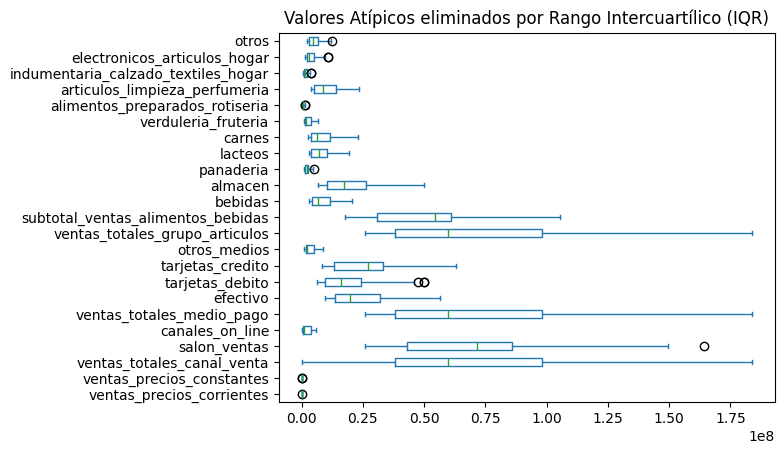

In [8]:
num = df_limpio.select_dtypes(include=[np.number])

# Calcular Q1, Q3 e IQR
Q1 = num.quantile(0.25)
Q3 = num.quantile(0.75)
IQR = Q3 - Q1

limite_superior_iqr = Q3 + 1.5 * IQR
limite_inferior_iqr = Q1 - 1.5 * IQR

# Límites IQR
print('Límite superior permitido (IQR):')
print(limite_superior_iqr)
print('\nLímite inferior permitido (IQR):')
print(limite_inferior_iqr)

df_outliers_iqr = num[(num <= limite_superior_iqr) & (num >= limite_inferior_iqr)]

# Ver que cuántos valores nulos quedan
print('\nValores nulos tras eliminar outliers (IQR):')
print(df_outliers_iqr.isnull().sum())

plt.figure(figsize=(15, 8))
df_outliers_iqr.plot(kind='box', vert=False)
plt.title('Valores Atípicos eliminados por Rango Intercuartílico (IQR)')
plt.show()